# Jason Lee CIS 9655 Final Presentation

## COVID-19 Vaccinations

**COVID-19 Vaccinations Dataset**  
https://www.kaggle.com/gpreda/covid-world-vaccination-progress  
https://ourworldindata.org/  
This dataset tracks the world's COVID-19 vaccination progress.

**COVID-19 Infections Dataset**  
https://ourworldindata.org/covid-cases  
This dataset trackings world's COVID-19 cases.

Big Idea: With vaccines rolling out recently, we want to track the COVID-19 vaccine progress and how it has helped COVID-19 infections around the world, specifically in the United States.

Story: After a long 10 months since COVID-19 hit the United States, COVID-19 vaccines were approved in January through emergency authorization. The next obstacle was determining how to distribute them efficiently to reach herd immunity. Our goal is to track the COVID-19 vaccine progress from January to late April and evaluate how it has helped COVID-19 infections around the world. To do this, we looked at countries' total number of vaccinations given, as well as, number of vaccinations in relation to the countries' population. The graphs show that even though some countries like the United States and China have given out hundreds of millions of vaccinations, a very large part of their population are still not vaccinated yet. We also look at daily vaccination progress and three countries, the US, China, and India, lead the way. However, it seems like all three countries platued at a certin point in their daily vaccinations and actually declined. Lastly, we looked at daily vaccinations and new COVID-19 cases within the same time frame, January to March. We can see infections have decreased dramatically during this time while we continued to increase vaccinations. This may suggest that the COVID-19 vaccinations are helping keep infections low. We need to continue to roll out vaccines to everyone effectively and efficiently so we can get back to normal as soon as possible. 

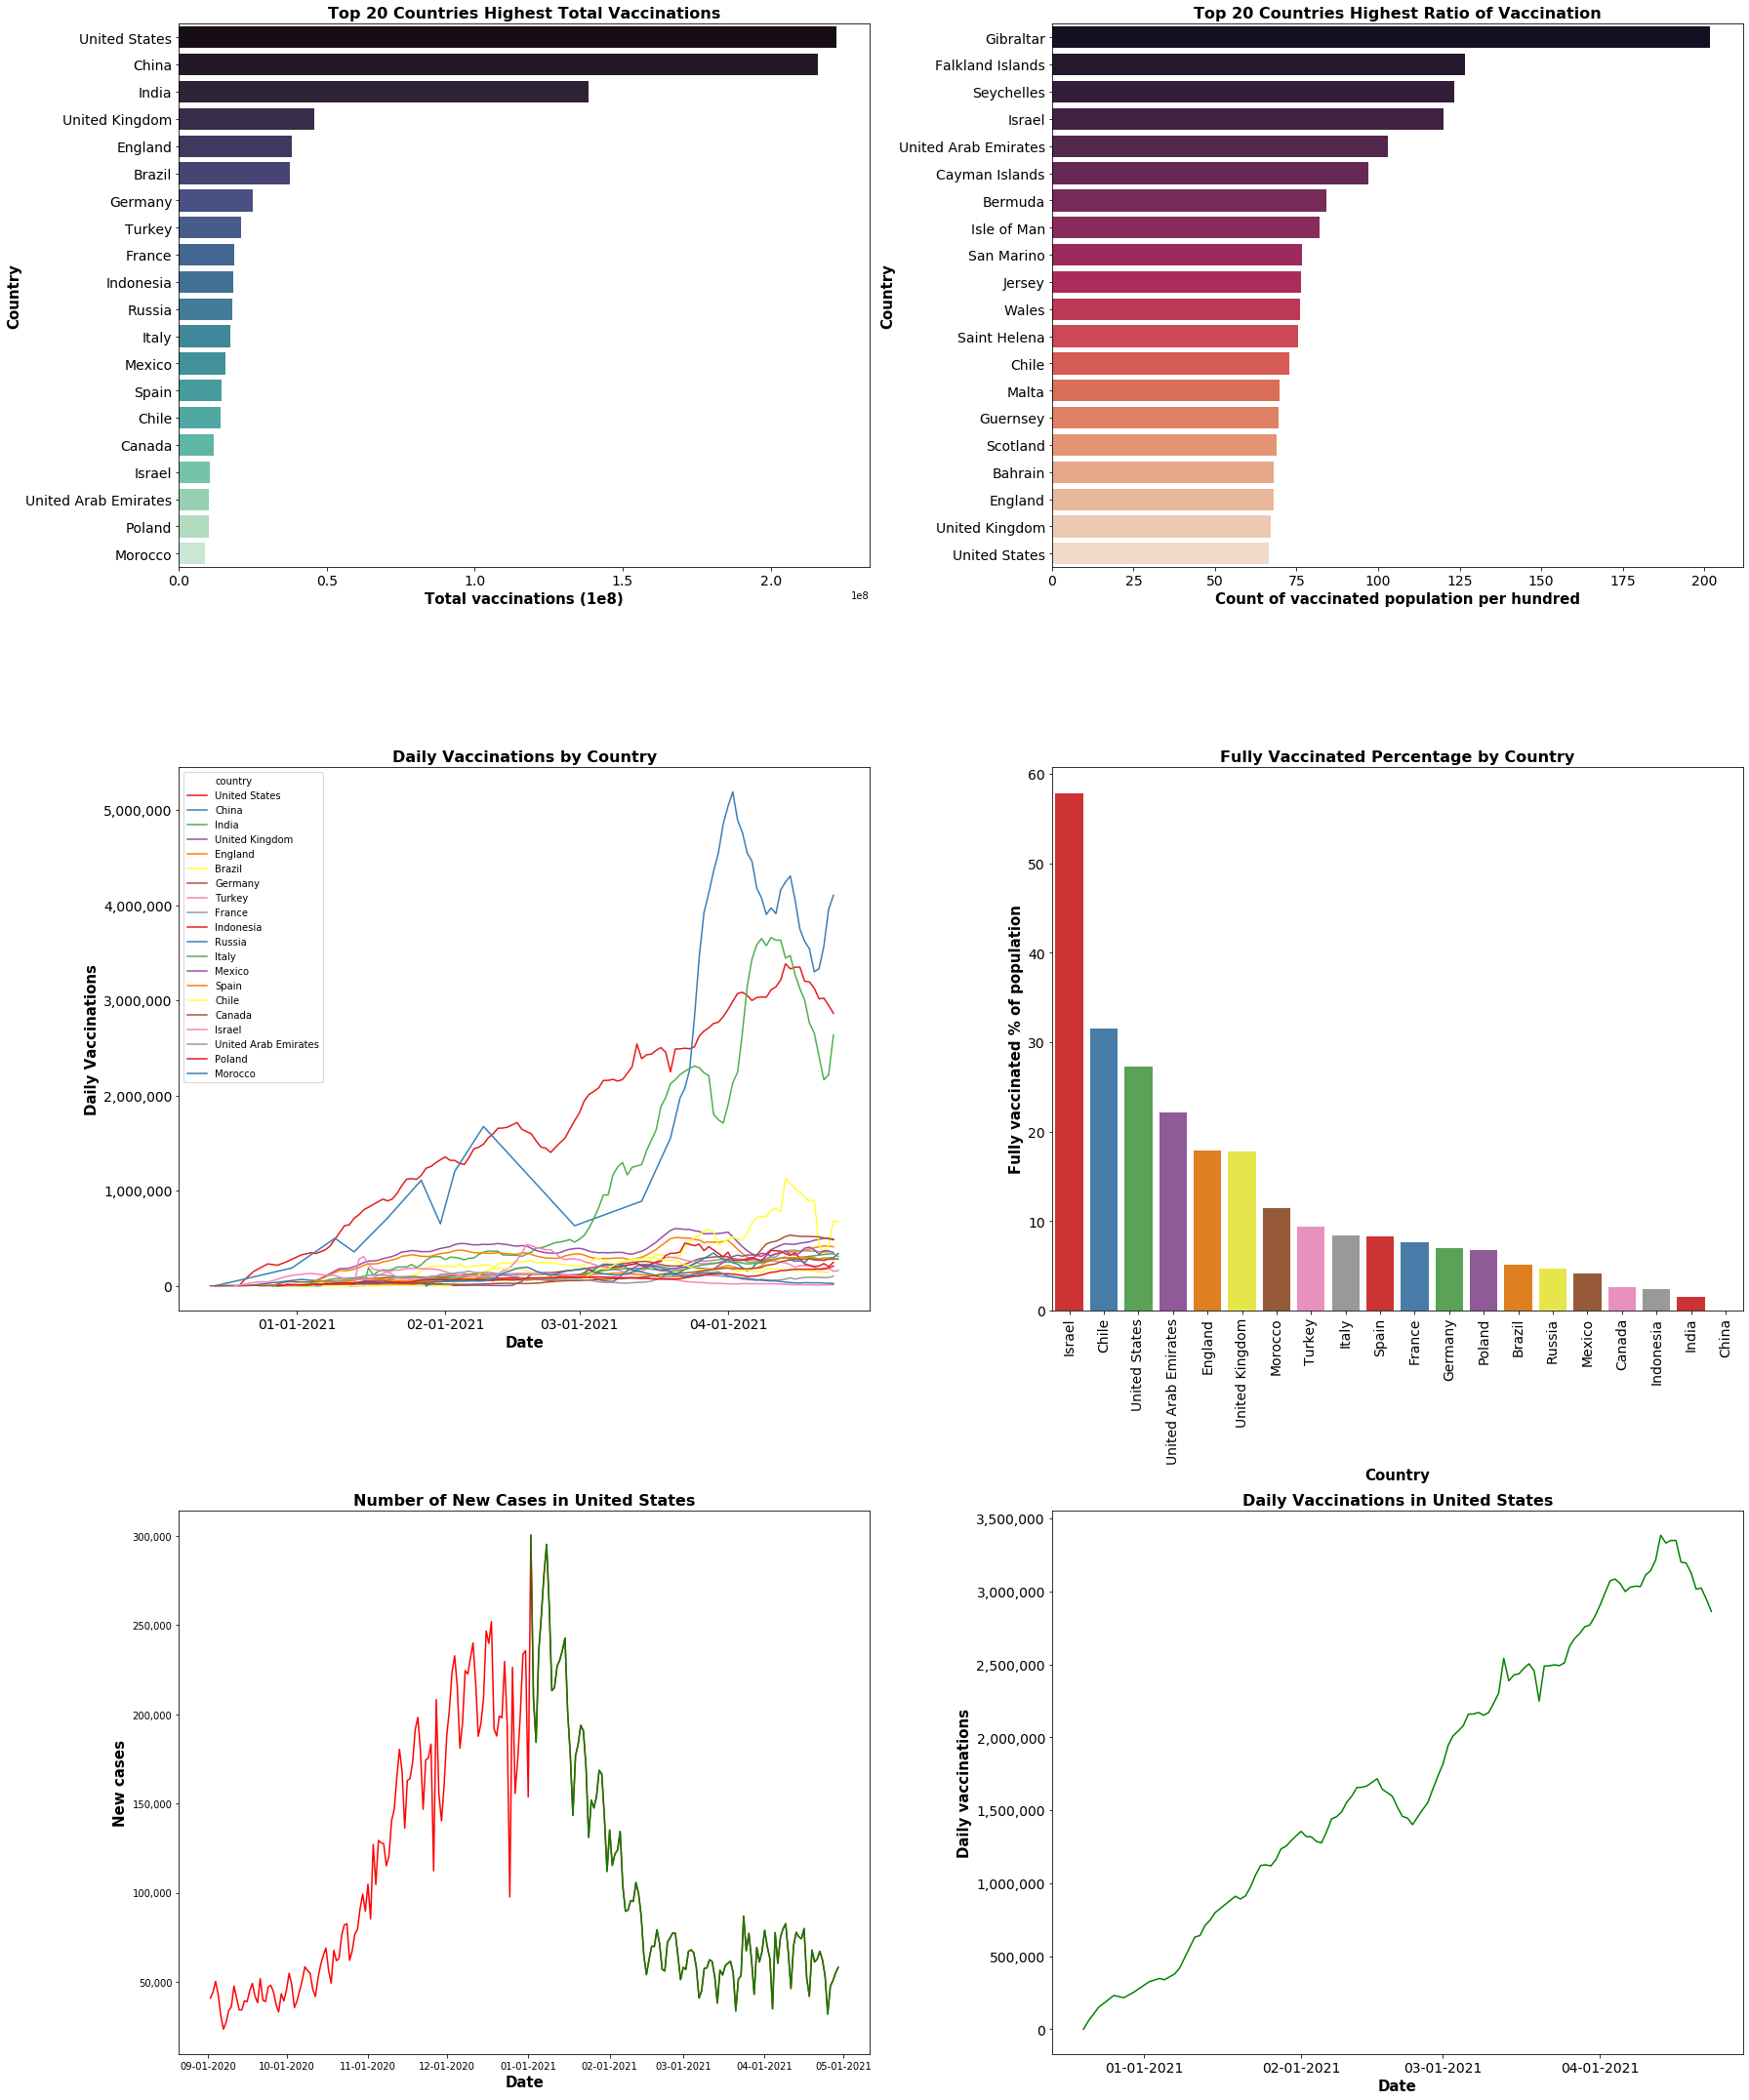

In [99]:
fig = plt.figure(figsize = (25, 30))

ax1 = fig.add_subplot(3, 2, 1)
sns.catplot(x = 'total_vaccinations', y = 'country', data = vac_by_country, kind = 'bar', \
            ci = None, orient = 'h', palette = 'mako', ax = ax1)
ax1.set_xlabel('Total vaccinations (1e8)', weight = 'bold', fontsize = 15)
ax1.set_ylabel('Country', weight = 'bold', fontsize = 15)
ax1.set_title('Top 20 Countries Highest Total Vaccinations', weight = 'bold', fontsize = 16)
ax1.tick_params(axis = "x", labelsize = 14)
ax1.tick_params(axis = "y", labelsize = 14)
plt.close(2)

ax2 = fig.add_subplot(3, 2, 2)
sns.catplot(x = 'total_vaccinations_per_hundred', y = 'country', data = vac_by_country_percent, kind = 'bar', \
            ci = None, orient = 'h', palette = 'rocket', ax = ax2)
ax2.set_xlabel('Count of vaccinated population per hundred', weight = 'bold', fontsize = 15)
ax2.set_ylabel('Country', weight = 'bold', fontsize = 15)
ax2.set_title('Top 20 Countries Highest Ratio of Vaccination', weight = 'bold', fontsize = 16)
ax2.tick_params(axis = "x", labelsize = 14)
ax2.tick_params(axis = "y", labelsize = 14)
plt.close(2)

ax3 = fig.add_subplot(3, 2, 3)
sns.lineplot(x = 'date', y = 'daily_vaccinations', data = daily_vac_by_country, ci = None, hue = 'country'\
             ,palette = 'Set1', hue_order = country, estimator = 'sum')
date_form = DateFormatter("%m-%d-%Y")
ax3.xaxis.set_major_formatter(date_form)
ax3.xaxis.set_major_locator(mdates.MonthLocator(interval = 1))
ax3.set_xlabel('Date', weight = 'bold', fontsize = 15)
ax3.set_ylabel('Daily Vaccinations', weight = 'bold', fontsize = 15)
ax3.set_title('Daily Vaccinations by Country', weight = 'bold', fontsize = 16)
ax3.tick_params(axis = "x", labelsize = 14)
ax3.tick_params(axis = "y", labelsize = 14)
ax3.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax4 = fig.add_subplot(3, 2, 4)
sns.barplot(x = 'country', y = 'people_fully_vaccinated_per_hundred', data = full_vac_percent, palette = 'Set1')
ax4.set_xticklabels(labels = full_vac_percent.country, rotation = 90, fontsize = 14)
ax4.set_xlabel('Country', fontsize = 15, weight = 'bold')
ax4.set_ylabel('Fully vaccinated % of population', fontsize = 15, weight = 'bold')
ax4.set_title('Fully Vaccinated Percentage by Country', fontsize = 16, weight = 'bold')
# ax.tick_params(axis = "x", labelsize = 11)
ax4.tick_params(axis = "y", labelsize = 14)

ax5 = fig.add_subplot(3, 2, 5)
sns.lineplot(x = 'date', y = 'new_cases', data = us_covid_cases_filtered, ci = None, \
             palette = 'Set1', estimator = 'sum', color = 'red')

sns.lineplot(x = 'date', y = 'new_cases', data = us_covid_cases_filtered[(us_covid_cases_filtered['date'] > '2021-01-01') &\
                (us_covid_cases_filtered['date'] < '2021-04-30')], ci = None, color = 'green')
date_form = DateFormatter("%m-%d-%Y")
ax5.xaxis.set_major_formatter(date_form)
ax5.xaxis.set_major_locator(mdates.MonthLocator(interval = 1))
ax5.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax5.set_xlabel('Date', fontsize = 15, weight = 'bold')
ax5.set_ylabel('New cases', fontsize = 15, weight = 'bold')
ax5.set_title('Number of New Cases in United States', fontsize = 16, weight = 'bold')


ax6 = fig.add_subplot(3, 2, 6)
sns.lineplot(x = 'date', y = 'daily_vaccinations', data = vac1, ci = None, \
             palette = 'Set1', estimator = 'sum', color = 'green')

ax6.xaxis.set_major_formatter(date_form)
ax6.xaxis.set_major_locator(mdates.MonthLocator(interval = 1))
ax6.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax6.set_xlabel('Date', fontsize = 15, weight = 'bold')
ax6.set_ylabel('Daily vaccinations', fontsize = 15, weight = 'bold')
ax6.set_title('Daily Vaccinations in United States', fontsize = 16, weight = 'bold')
ax6.tick_params(axis = "x", labelsize = 14)
ax6.tick_params(axis = "y", labelsize = 14)

plt.tight_layout()

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.dates as mdates
import matplotlib
from matplotlib.dates import DateFormatter
from matplotlib.ticker import FuncFormatter
%matplotlib inline

In [2]:
df = pd.read_csv('country_vaccinations.csv')
vac = df.copy()
vac.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2/22/2021,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
1,Afghanistan,AFG,2/23/2021,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
2,Afghanistan,AFG,2/24/2021,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
3,Afghanistan,AFG,2/25/2021,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
4,Afghanistan,AFG,2/26/2021,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...


In [3]:
vac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13600 entries, 0 to 13599
Data columns (total 15 columns):
country                                13600 non-null object
iso_code                               13600 non-null object
date                                   13600 non-null object
total_vaccinations                     8096 non-null float64
people_vaccinated                      7387 non-null float64
people_fully_vaccinated                5377 non-null float64
daily_vaccinations_raw                 6781 non-null float64
daily_vaccinations                     13388 non-null float64
total_vaccinations_per_hundred         8096 non-null float64
people_vaccinated_per_hundred          7387 non-null float64
people_fully_vaccinated_per_hundred    5377 non-null float64
daily_vaccinations_per_million         13388 non-null float64
vaccines                               13600 non-null object
source_name                            13600 non-null object
source_website                     

In [4]:
vac.isnull().sum()

country                                   0
iso_code                                  0
date                                      0
total_vaccinations                     5504
people_vaccinated                      6213
people_fully_vaccinated                8223
daily_vaccinations_raw                 6819
daily_vaccinations                      212
total_vaccinations_per_hundred         5504
people_vaccinated_per_hundred          6213
people_fully_vaccinated_per_hundred    8223
daily_vaccinations_per_million          212
vaccines                                  0
source_name                               0
source_website                            0
dtype: int64

In [5]:
# dropping NA
vac = vac.drop(vac[vac.total_vaccinations.isna()].index)
vac.isna().sum()
vac.fillna(value=0, inplace= True)
vac.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8096 entries, 0 to 13599
Data columns (total 15 columns):
country                                8096 non-null object
iso_code                               8096 non-null object
date                                   8096 non-null object
total_vaccinations                     8096 non-null float64
people_vaccinated                      8096 non-null float64
people_fully_vaccinated                8096 non-null float64
daily_vaccinations_raw                 8096 non-null float64
daily_vaccinations                     8096 non-null float64
total_vaccinations_per_hundred         8096 non-null float64
people_vaccinated_per_hundred          8096 non-null float64
people_fully_vaccinated_per_hundred    8096 non-null float64
daily_vaccinations_per_million         8096 non-null float64
vaccines                               8096 non-null object
source_name                            8096 non-null object
source_website                         8096

In [6]:
# datetime
vac.date = pd.to_datetime(vac.date)

In [7]:
# cleaning up dataset - getting rid of unnecessary columns
vac = vac.drop(columns = ['iso_code', 'source_name', 'source_website']).reset_index()
vac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8096 entries, 0 to 8095
Data columns (total 13 columns):
index                                  8096 non-null int64
country                                8096 non-null object
date                                   8096 non-null datetime64[ns]
total_vaccinations                     8096 non-null float64
people_vaccinated                      8096 non-null float64
people_fully_vaccinated                8096 non-null float64
daily_vaccinations_raw                 8096 non-null float64
daily_vaccinations                     8096 non-null float64
total_vaccinations_per_hundred         8096 non-null float64
people_vaccinated_per_hundred          8096 non-null float64
people_fully_vaccinated_per_hundred    8096 non-null float64
daily_vaccinations_per_million         8096 non-null float64
vaccines                               8096 non-null object
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 822.4+ KB


In [8]:
# dataset time
print('Data is collected from {} to {}'.format(vac.date.min(), vac.date.max()))

Data is collected from 2020-12-14 00:00:00 to 2021-04-24 00:00:00


In [9]:
# 
print('Total number of countries: {}'.format(len(vac.country.unique())))

Total number of countries: 193


## Highest Vaccination by Country

In [10]:
# groupby country
vac_by_country = vac[['country', 'total_vaccinations']].groupby('country').max().sort_values('total_vaccinations', \
    ascending = False)
vac_by_country = vac_by_country[:20].reset_index()

In [11]:
vac_by_country.head()

,country,total_vaccinations
0,United States,222322230.0
1,China,216084000.0
2,India,138379832.0
3,United Kingdom,45580400.0
4,England,38189536.0


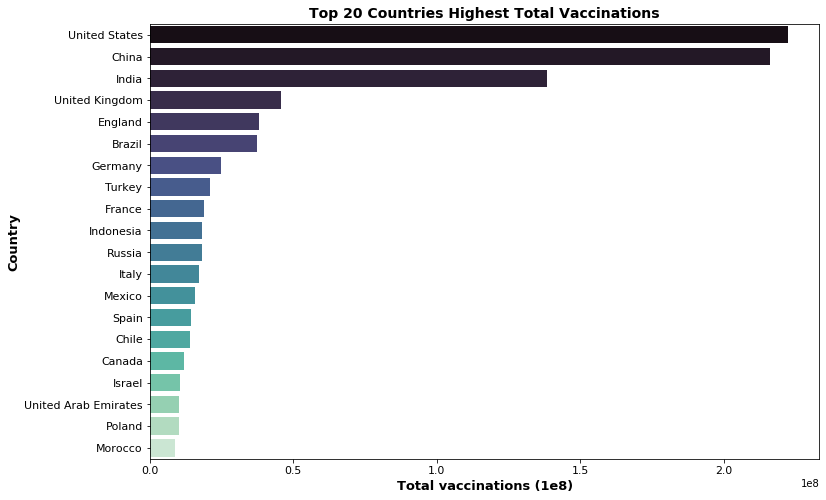

In [12]:
fig, ax = plt.subplots(figsize = (12,8))
sns.catplot(x = 'total_vaccinations', y = 'country', data = vac_by_country, kind = 'bar', \
            ci = None, orient = 'h', palette = 'mako', ax = ax)
ax.set_xlabel('Total vaccinations (1e8)', weight = 'bold', fontsize = 13)
ax.set_ylabel('Country', weight = 'bold', fontsize = 13)
ax.set_title('Top 20 Countries Highest Total Vaccinations', weight = 'bold', fontsize = 14)
ax.tick_params(axis = "x", labelsize = 11)
ax.tick_params(axis = "y", labelsize = 11)
plt.close(2)

## Highest Vaccination per Hundred (percent of population vaccinated)

In [13]:
# counts total number of vaccines / population
vac_by_country_percent = vac[['country', 'total_vaccinations_per_hundred']].groupby('country').max().\
    sort_values('total_vaccinations_per_hundred', ascending = False)
vac_by_country_percent = vac_by_country_percent[:20].reset_index()

In [14]:
vac_by_country_percent.head()

,country,total_vaccinations_per_hundred
0,Gibraltar,201.75
1,Falkland Islands,126.53
2,Seychelles,123.21
3,Israel,119.96
4,United Arab Emirates,103.07


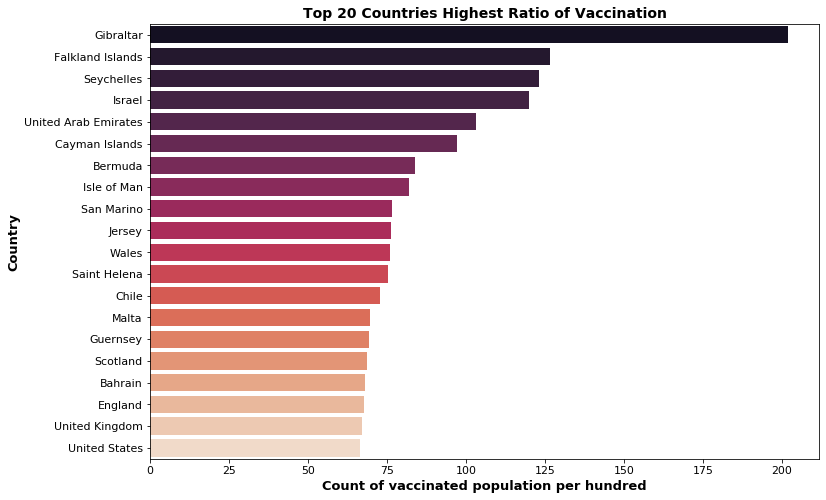

In [15]:
fig, ax = plt.subplots(figsize = (12,8))
sns.catplot(x = 'total_vaccinations_per_hundred', y = 'country', data = vac_by_country_percent, kind = 'bar', \
            ci = None, orient = 'h', palette = 'rocket', ax = ax)
# height = 6, aspect = 2
ax.set_xlabel('Count of vaccinated population per hundred', weight = 'bold', fontsize = 13)
ax.set_ylabel('Country', weight = 'bold', fontsize = 13)
ax.set_title('Top 20 Countries Highest Ratio of Vaccination', weight = 'bold', fontsize = 14)
ax.tick_params(axis = "x", labelsize = 11)
ax.tick_params(axis = "y", labelsize = 11)
plt.close(2)

## Daily Vaccinations - Use same countries as Total Vaccinations to compare

C:\Users\nycja\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


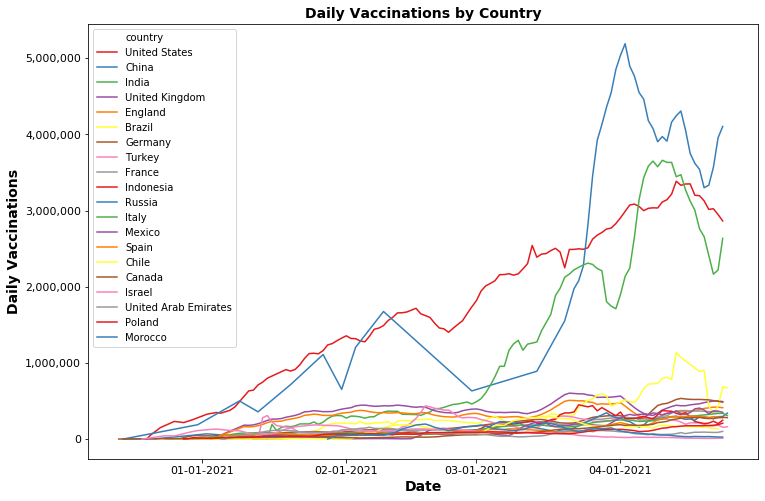

In [16]:
country = vac_by_country.country
daily_vac_by_country = vac[vac['country'].isin(country)]

fig, ax = plt.subplots(figsize = (12,8))
sns.lineplot(x = 'date', y = 'daily_vaccinations', data = daily_vac_by_country, ci = None, hue = 'country'\
             ,palette = 'Set1', hue_order = country, estimator = 'sum')
date_form = DateFormatter("%m-%d-%Y")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval = 1))
ax.set_xlabel('Date', weight = 'bold', fontsize = 14)
ax.set_ylabel('Daily Vaccinations', weight = 'bold', fontsize = 14)
ax.set_title('Daily Vaccinations by Country', weight = 'bold', fontsize = 14)
ax.tick_params(axis = "x", labelsize = 11)
ax.tick_params(axis = "y", labelsize = 11)
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

## Fully Vaccinated Percentage of Population by Country

In [17]:
country = vac_by_country.country
full_vac = vac[vac['country'].isin(country)]

full_vac_percent = full_vac[['country', 'people_fully_vaccinated_per_hundred']].groupby('country').max().\
    sort_values('people_fully_vaccinated_per_hundred', ascending = False)
full_vac_percent = full_vac_percent[:20].reset_index()

In [18]:
full_vac_percent

,country,people_fully_vaccinated_per_hundred
0,Israel,57.85
1,Chile,31.48
2,United States,27.26
3,United Arab Emirates,22.12
4,England,17.92
5,United Kingdom,17.78
6,Morocco,11.43
7,Turkey,9.43
8,Italy,8.43
9,Spain,8.26


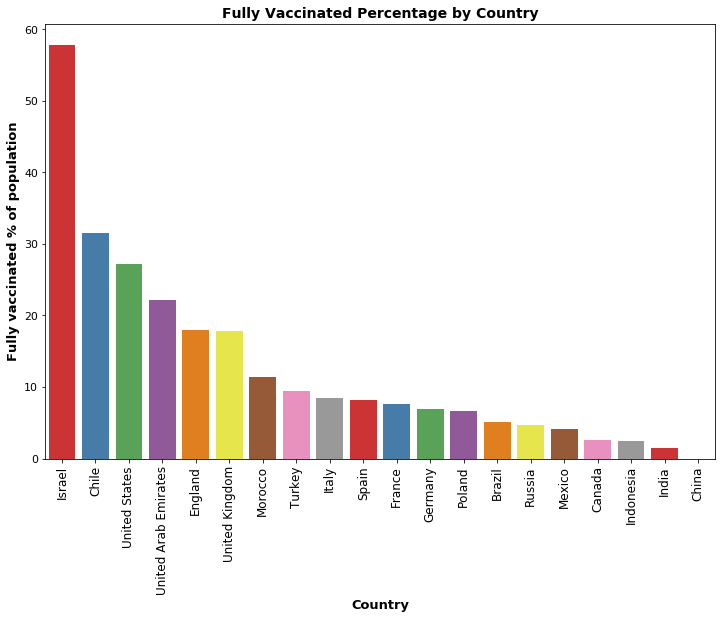

In [19]:
fig, ax = plt.subplots(figsize = (12,8))
sns.barplot(x = 'country', y = 'people_fully_vaccinated_per_hundred', data = full_vac_percent, palette = 'Set1')
ax.set_xticklabels(labels = full_vac_percent.country, rotation = 90, fontsize = 12)
ax.set_xlabel('Country', fontsize = 13, weight = 'bold')
ax.set_ylabel('Fully vaccinated % of population', fontsize = 13, weight = 'bold')
ax.set_title('Fully Vaccinated Percentage by Country', fontsize = 14, weight = 'bold')
# ax.tick_params(axis = "x", labelsize = 11)
ax.tick_params(axis = "y", labelsize = 11)

## Vaccinations and COVID-19 Cases

In [20]:
vac.head()

,index,country,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines
0,0,Afghanistan,2021-02-22,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,Oxford/AstraZeneca
1,6,Afghanistan,2021-02-28,8200.0,8200.0,0.0,0.0,1367.0,0.02,0.02,0.0,35.0,Oxford/AstraZeneca
2,22,Afghanistan,2021-03-16,54000.0,54000.0,0.0,0.0,2862.0,0.14,0.14,0.0,74.0,Oxford/AstraZeneca
3,44,Afghanistan,2021-04-07,120000.0,120000.0,0.0,0.0,3000.0,0.31,0.31,0.0,77.0,Oxford/AstraZeneca
4,59,Afghanistan,2021-04-22,240000.0,240000.0,0.0,0.0,8000.0,0.62,0.62,0.0,206.0,Oxford/AstraZeneca


In [21]:
vac1 = vac[vac['country'] == 'United States']
vac1.head()

,index,country,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines
7698,13111,United States,2020-12-20,556208.0,556208.0,0.0,0.0,0.0,0.17,0.17,0.0,0.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
7699,13112,United States,2020-12-21,614117.0,614117.0,0.0,57909.0,57909.0,0.18,0.18,0.0,173.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
7700,13114,United States,2020-12-23,1008025.0,1008025.0,0.0,0.0,150606.0,0.30,0.30,0.0,450.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
7701,13117,United States,2020-12-26,1944585.0,1944585.0,0.0,0.0,231396.0,0.58,0.58,0.0,692.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
7702,13119,United States,2020-12-28,2127143.0,2127143.0,0.0,0.0,216147.0,0.64,0.64,0.0,646.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech"


In [24]:
us_covid_cases = pd.read_csv('US-covid-data.csv')
us_covid_cases.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,USA,North America,United States,1/22/2020,1,NaN,NaN,NaN,NaN,NaN,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926
1,USA,North America,United States,1/23/2020,1,0.0,NaN,NaN,NaN,NaN,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926
2,USA,North America,United States,1/24/2020,2,1.0,NaN,NaN,NaN,NaN,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926
3,USA,North America,United States,1/25/2020,2,0.0,NaN,NaN,NaN,NaN,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926
4,USA,North America,United States,1/26/2020,5,3.0,NaN,NaN,NaN,NaN,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926


In [34]:
us_covid_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465 entries, 0 to 464
Data columns (total 59 columns):
iso_code                                 465 non-null object
continent                                465 non-null object
location                                 465 non-null object
date                                     465 non-null object
total_cases                              465 non-null int64
new_cases                                464 non-null float64
new_cases_smoothed                       459 non-null float64
total_deaths                             427 non-null float64
new_deaths                               427 non-null float64
new_deaths_smoothed                      459 non-null float64
total_cases_per_million                  465 non-null float64
new_cases_per_million                    464 non-null float64
new_cases_smoothed_per_million           459 non-null float64
total_deaths_per_million                 427 non-null float64
new_deaths_per_million           

In [35]:
us_covid_cases.date = pd.to_datetime(us_covid_cases.date)

In [38]:
# dataset time
print('Data is collected from {} to {}'.format(us_covid_cases.date.min(), us_covid_cases.date.max()))

Data is collected from 2020-01-22 00:00:00 to 2021-04-30 00:00:00


In [61]:
# filter for Sept - Present
us_covid_cases_filtered = us_covid_cases[(us_covid_cases['date'] > '2020-09-01') & (us_covid_cases['date'] < '2021-04-30')]

In [62]:
us_covid_cases_filtered.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
224,USA,North America,United States,2020-09-02,6109773,41014.0,41086.571,185911.0,1079.0,870.857,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926
225,USA,North America,United States,2020-09-03,6153983,44210.0,40919.429,186948.0,1037.0,859.857,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926
226,USA,North America,United States,2020-09-04,6204376,50393.0,41425.857,187906.0,958.0,857.143,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926
227,USA,North America,United States,2020-09-05,6247464,43088.0,41476.857,188668.0,762.0,837.286,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926
228,USA,North America,United States,2020-09-06,6278633,31169.0,41018.000,189137.0,469.0,839.571,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926


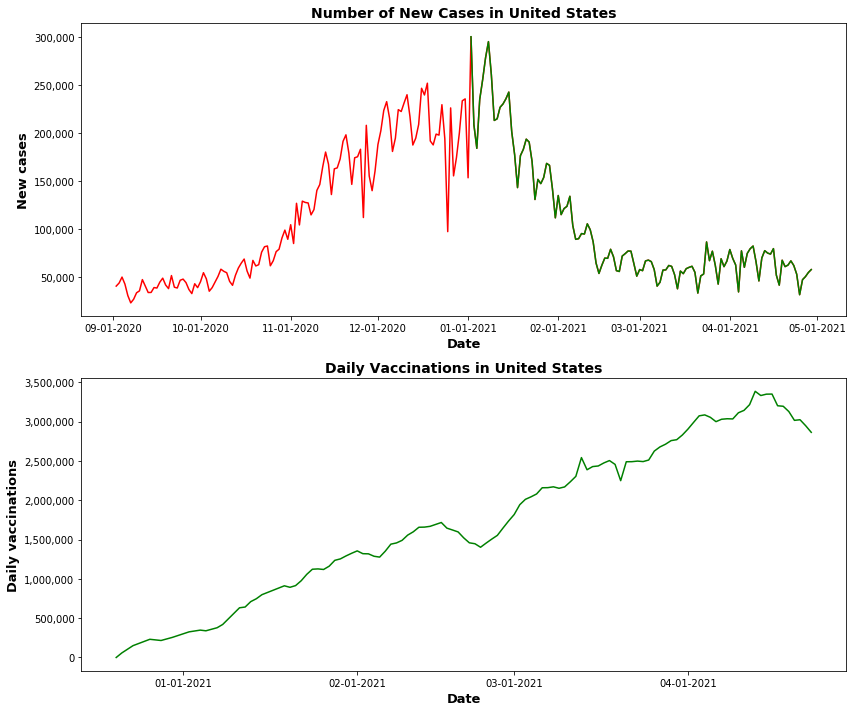

In [72]:
fig, ax = plt.subplots(2,1, figsize = (12,10))
sns.lineplot(x = 'date', y = 'new_cases', data = us_covid_cases_filtered, ci = None, \
             palette = 'Set1', estimator = 'sum', ax = ax[0], color = 'red')

sns.lineplot(x = 'date', y = 'new_cases', data = us_covid_cases_filtered[(us_covid_cases_filtered['date'] > '2021-01-01') &\
                (us_covid_cases_filtered['date'] < '2021-04-30')], ci = None, color = 'green', ax = ax[0])

sns.lineplot(x = 'date', y = 'daily_vaccinations', data = vac1, ci = None, \
             palette = 'Set1', estimator = 'sum', ax = ax[1], color = 'green')

date_form = DateFormatter("%m-%d-%Y")
ax[0].xaxis.set_major_formatter(date_form)
ax[0].xaxis.set_major_locator(mdates.MonthLocator(interval = 1))
ax[0].get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax[0].set_xlabel('Date', fontsize = 13, weight = 'bold')
ax[0].set_ylabel('New cases', fontsize = 13, weight = 'bold')
ax[0].set_title('Number of New Cases in United States', fontsize = 14, weight = 'bold')

ax[1].xaxis.set_major_formatter(date_form)
ax[1].xaxis.set_major_locator(mdates.MonthLocator(interval = 1))
ax[1].get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax[1].set_xlabel('Date', fontsize = 13, weight = 'bold')
ax[1].set_ylabel('Daily vaccinations', fontsize = 13, weight = 'bold')
ax[1].set_title('Daily Vaccinations in United States', fontsize = 14, weight = 'bold')
plt.tight_layout()